#### Red and White Wine
Continue the analysis and review relationships in the wine data set using EDA techniques.

In [1]:
# Load required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

#### Import data
Next import the cleaned data

In [2]:
wine = pd.read_csv('../data/wineQual.csv')
# Recall red is 2 and white is 1

In [3]:
# Check the first set of records
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  wine_color  
0      8.8        6           2  
1      9.5        

In [4]:
# Understand the dimension of the data
print(wine[wine['wine_color']==2].shape) # Red
print(wine[wine['wine_color']==1].shape) # White

(4898, 13)
(1599, 13)


In [5]:
# Let's look at some descriptive statistics
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality   wine_color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     1.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     1.000000  
25%       3.110000     0.430000     9.500000     5.000000     2.000000  
50%       3.210000     0.510000    10.300000     6.000000     2.000000  
75%       3.320000     0.600000    11.300000     6.000000     2.000000  
max       4.010000     2.000000    14.900000     9.000000     2.000000

In [6]:
# Let's confirm data-types
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_color                int64
dtype: object

#### Plot out distributions by wine color and compare them

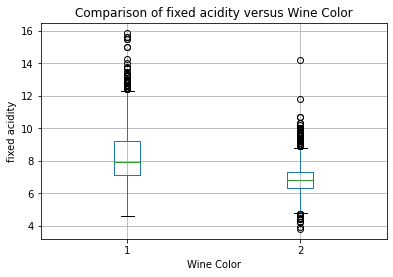

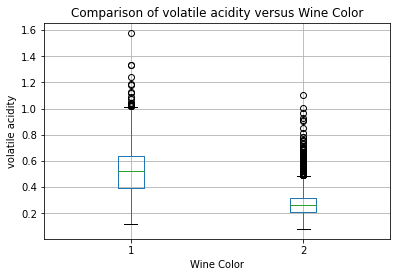

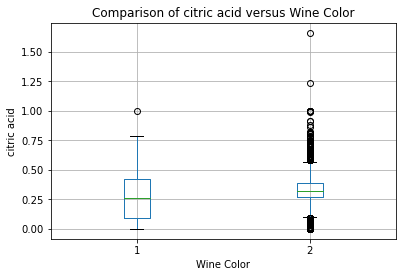

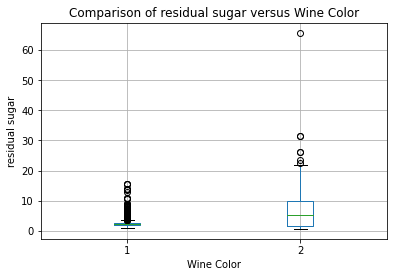

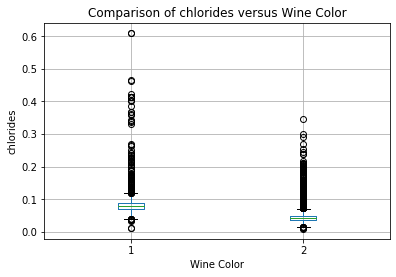

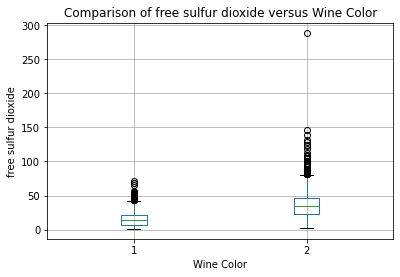

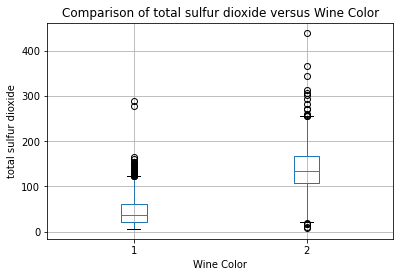

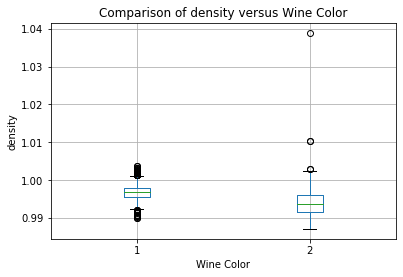

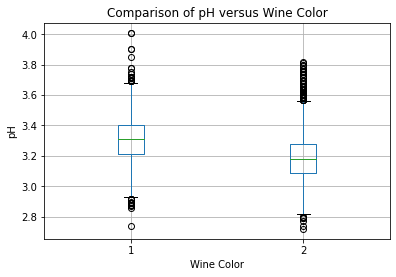

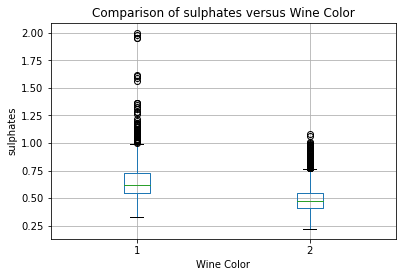

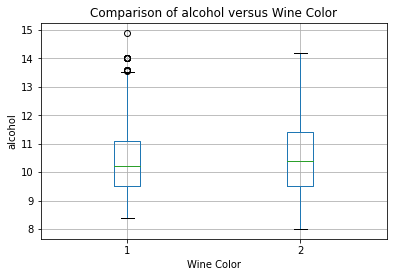

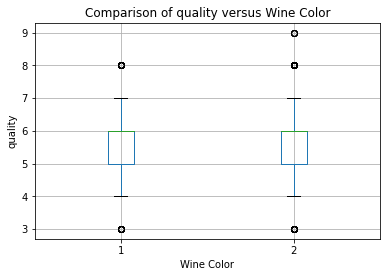

In [7]:
col = wine.columns.drop('wine_color')  # Don't need to plot Wine Color by Wine Color
for c in col:
    _ = wine.boxplot(column = c, by = 'wine_color')
    plt.title('Comparison of '+ c + ' versus Wine Color')
    plt.suptitle('') 
    plt.xlabel('Wine Color')
    plt.ylabel(c)
    plt.show()

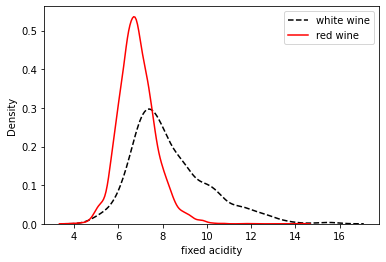

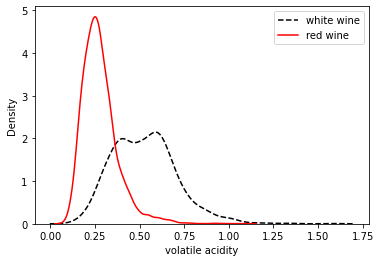

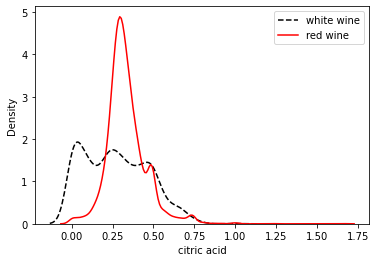

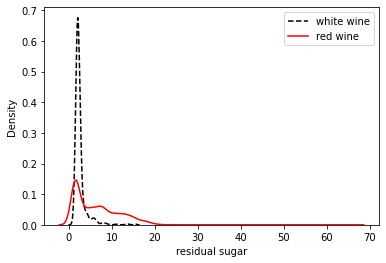

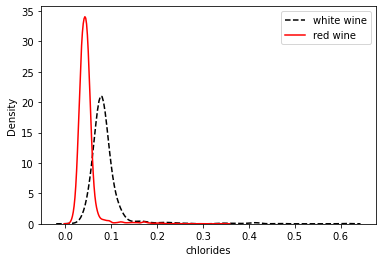

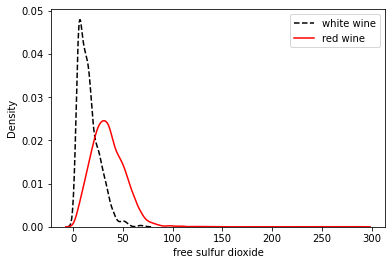

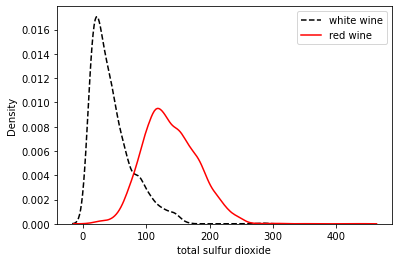

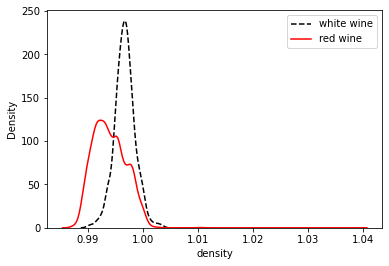

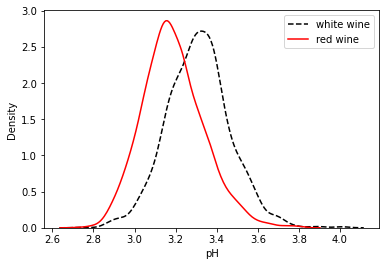

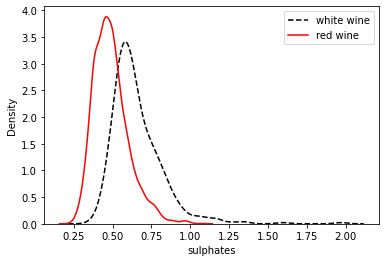

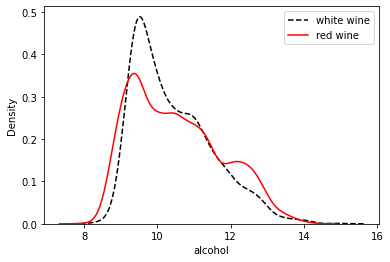

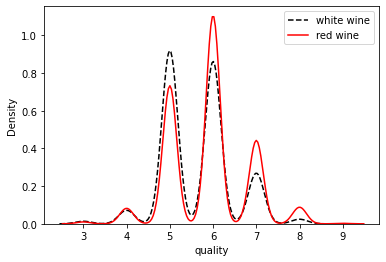

In [8]:
for c in col:
    fig=sns.kdeplot(wine.loc[wine['wine_color']==1, c], color = 'black', linestyle ='--')
    fig=sns.kdeplot(wine.loc[wine['wine_color']==2, c], color = 'r')
    fig.legend(['white wine', 'red wine'])
    plt.show()

### There are clearly some differences between red and white
The quality measure is the output variable and there are some differences in quality comparing the two types of wine.

Next let's look at relationships between the variables

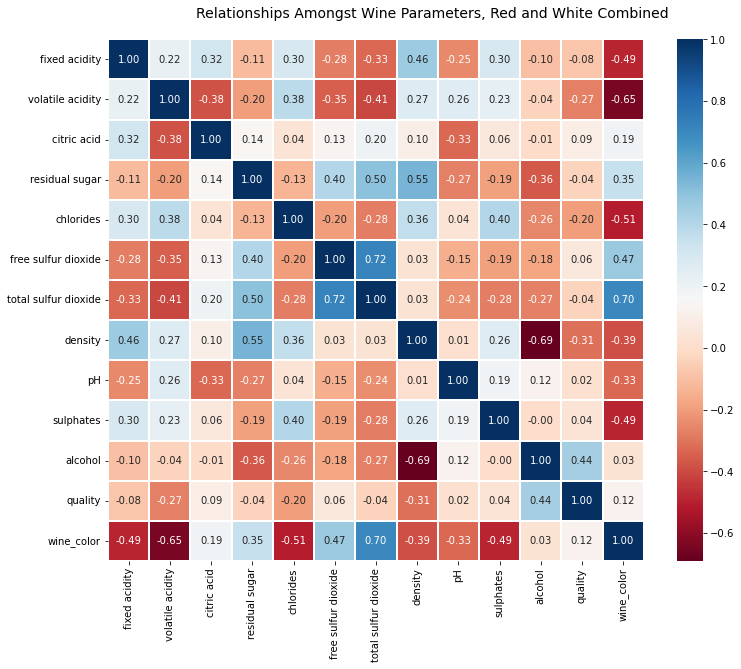

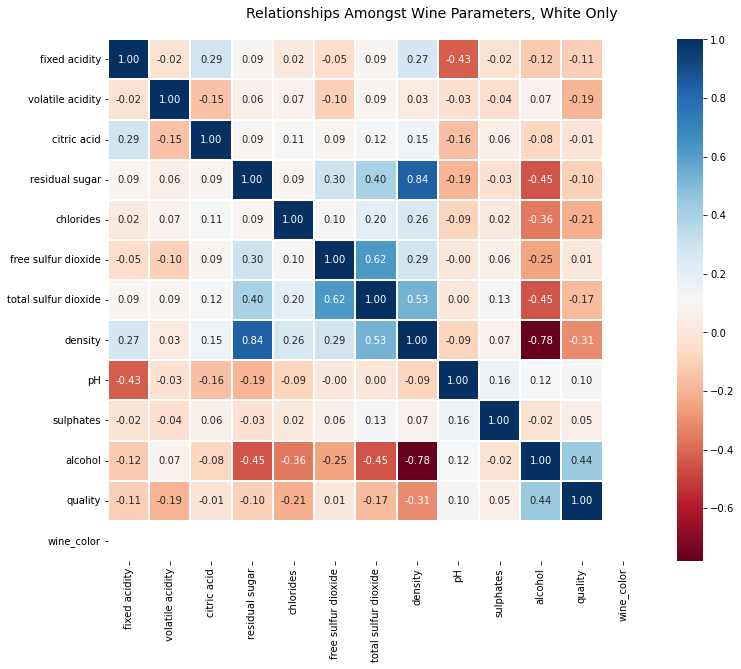

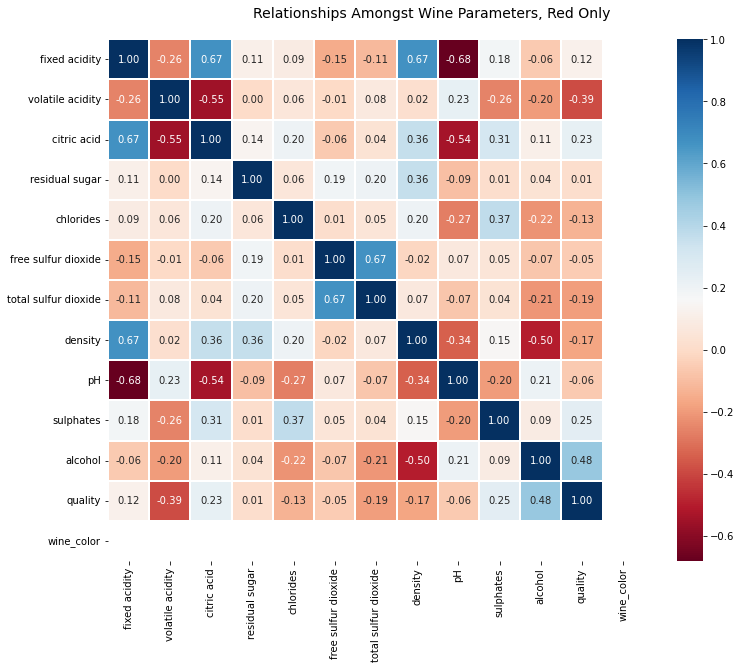

In [9]:
col = wine.columns
# First all combined
corrmat = wine[col].corr()
fig, ax = plt.subplots(figsize=(12, 9))
heat_map = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="RdBu",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
_ = fig.suptitle('Relationships Amongst Wine Parameters, Red and White Combined', horizontalalignment = 'center', fontsize=14)
plt.show()

# Next White only
corrmat = wine.loc[wine['wine_color']==2, col].corr()
fig, ax = plt.subplots(figsize=(12, 9))
heat_map = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="RdBu",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
_ = fig.suptitle('Relationships Amongst Wine Parameters, White Only', horizontalalignment = 'center', fontsize=14)
plt.show()

# Next Red Only
corrmat = wine.loc[wine['wine_color']==1, col].corr()
fig, ax = plt.subplots(figsize=(12, 9))
heat_map = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="RdBu",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
_ = fig.suptitle('Relationships Amongst Wine Parameters, Red Only', horizontalalignment = 'center', fontsize=14)
plt.show()

### Spearman R

Given that quality is a categorical variable, let's use Spearman's R to assess the relationships between quality and the other variables



In [10]:
spear = {}
col = wine.columns.drop('quality')
for c in col:
    corr, _ = np.round(spearmanr(wine['quality'], wine[c]), 4)
    spear[c] = corr
sorted_spear = sorted( ((v,k) for k,v in spear.items()), reverse=True)
for n in range(len(sorted_spear)):
    print("The Spreaman's R for "+sorted_spear[n][1] + " is " + str(sorted_spear[n][0]))

The Spreaman's R for alcohol is 0.4469
The Spreaman's R for wine_color is 0.123
The Spreaman's R for citric acid is 0.1057
The Spreaman's R for free sulfur dioxide is 0.0869
The Spreaman's R for pH is 0.0325
The Spreaman's R for sulphates is 0.0298
The Spreaman's R for residual sugar is -0.0169
The Spreaman's R for total sulfur dioxide is -0.0548
The Spreaman's R for fixed acidity is -0.0982
The Spreaman's R for volatile acidity is -0.2578
The Spreaman's R for chlorides is -0.2951
The Spreaman's R for density is -0.3228


#### Quality versus other measures
Ideally, we would like to use the quality categorical metric as the response variable and the others as the explanatory variables in a logistic-type regression.  At first glance, quality is positively related to alcohol, and negatively related to density, volatile acidity, and chlorides.

Amongst the variables, pH and acidity measures like fixed acidity, volatile acidity, and citric acid are strongly related as one would imagine given pH is a measure of acidity and alkalinity.

Note, there are differences is the relationship between quality and the other variables when we select red wine versus wine wine.  It seems likely we'll need wine_color as an explanatory variable and not simple combine the data sets and treat it as one.

Next, let's look at pairplots of the data

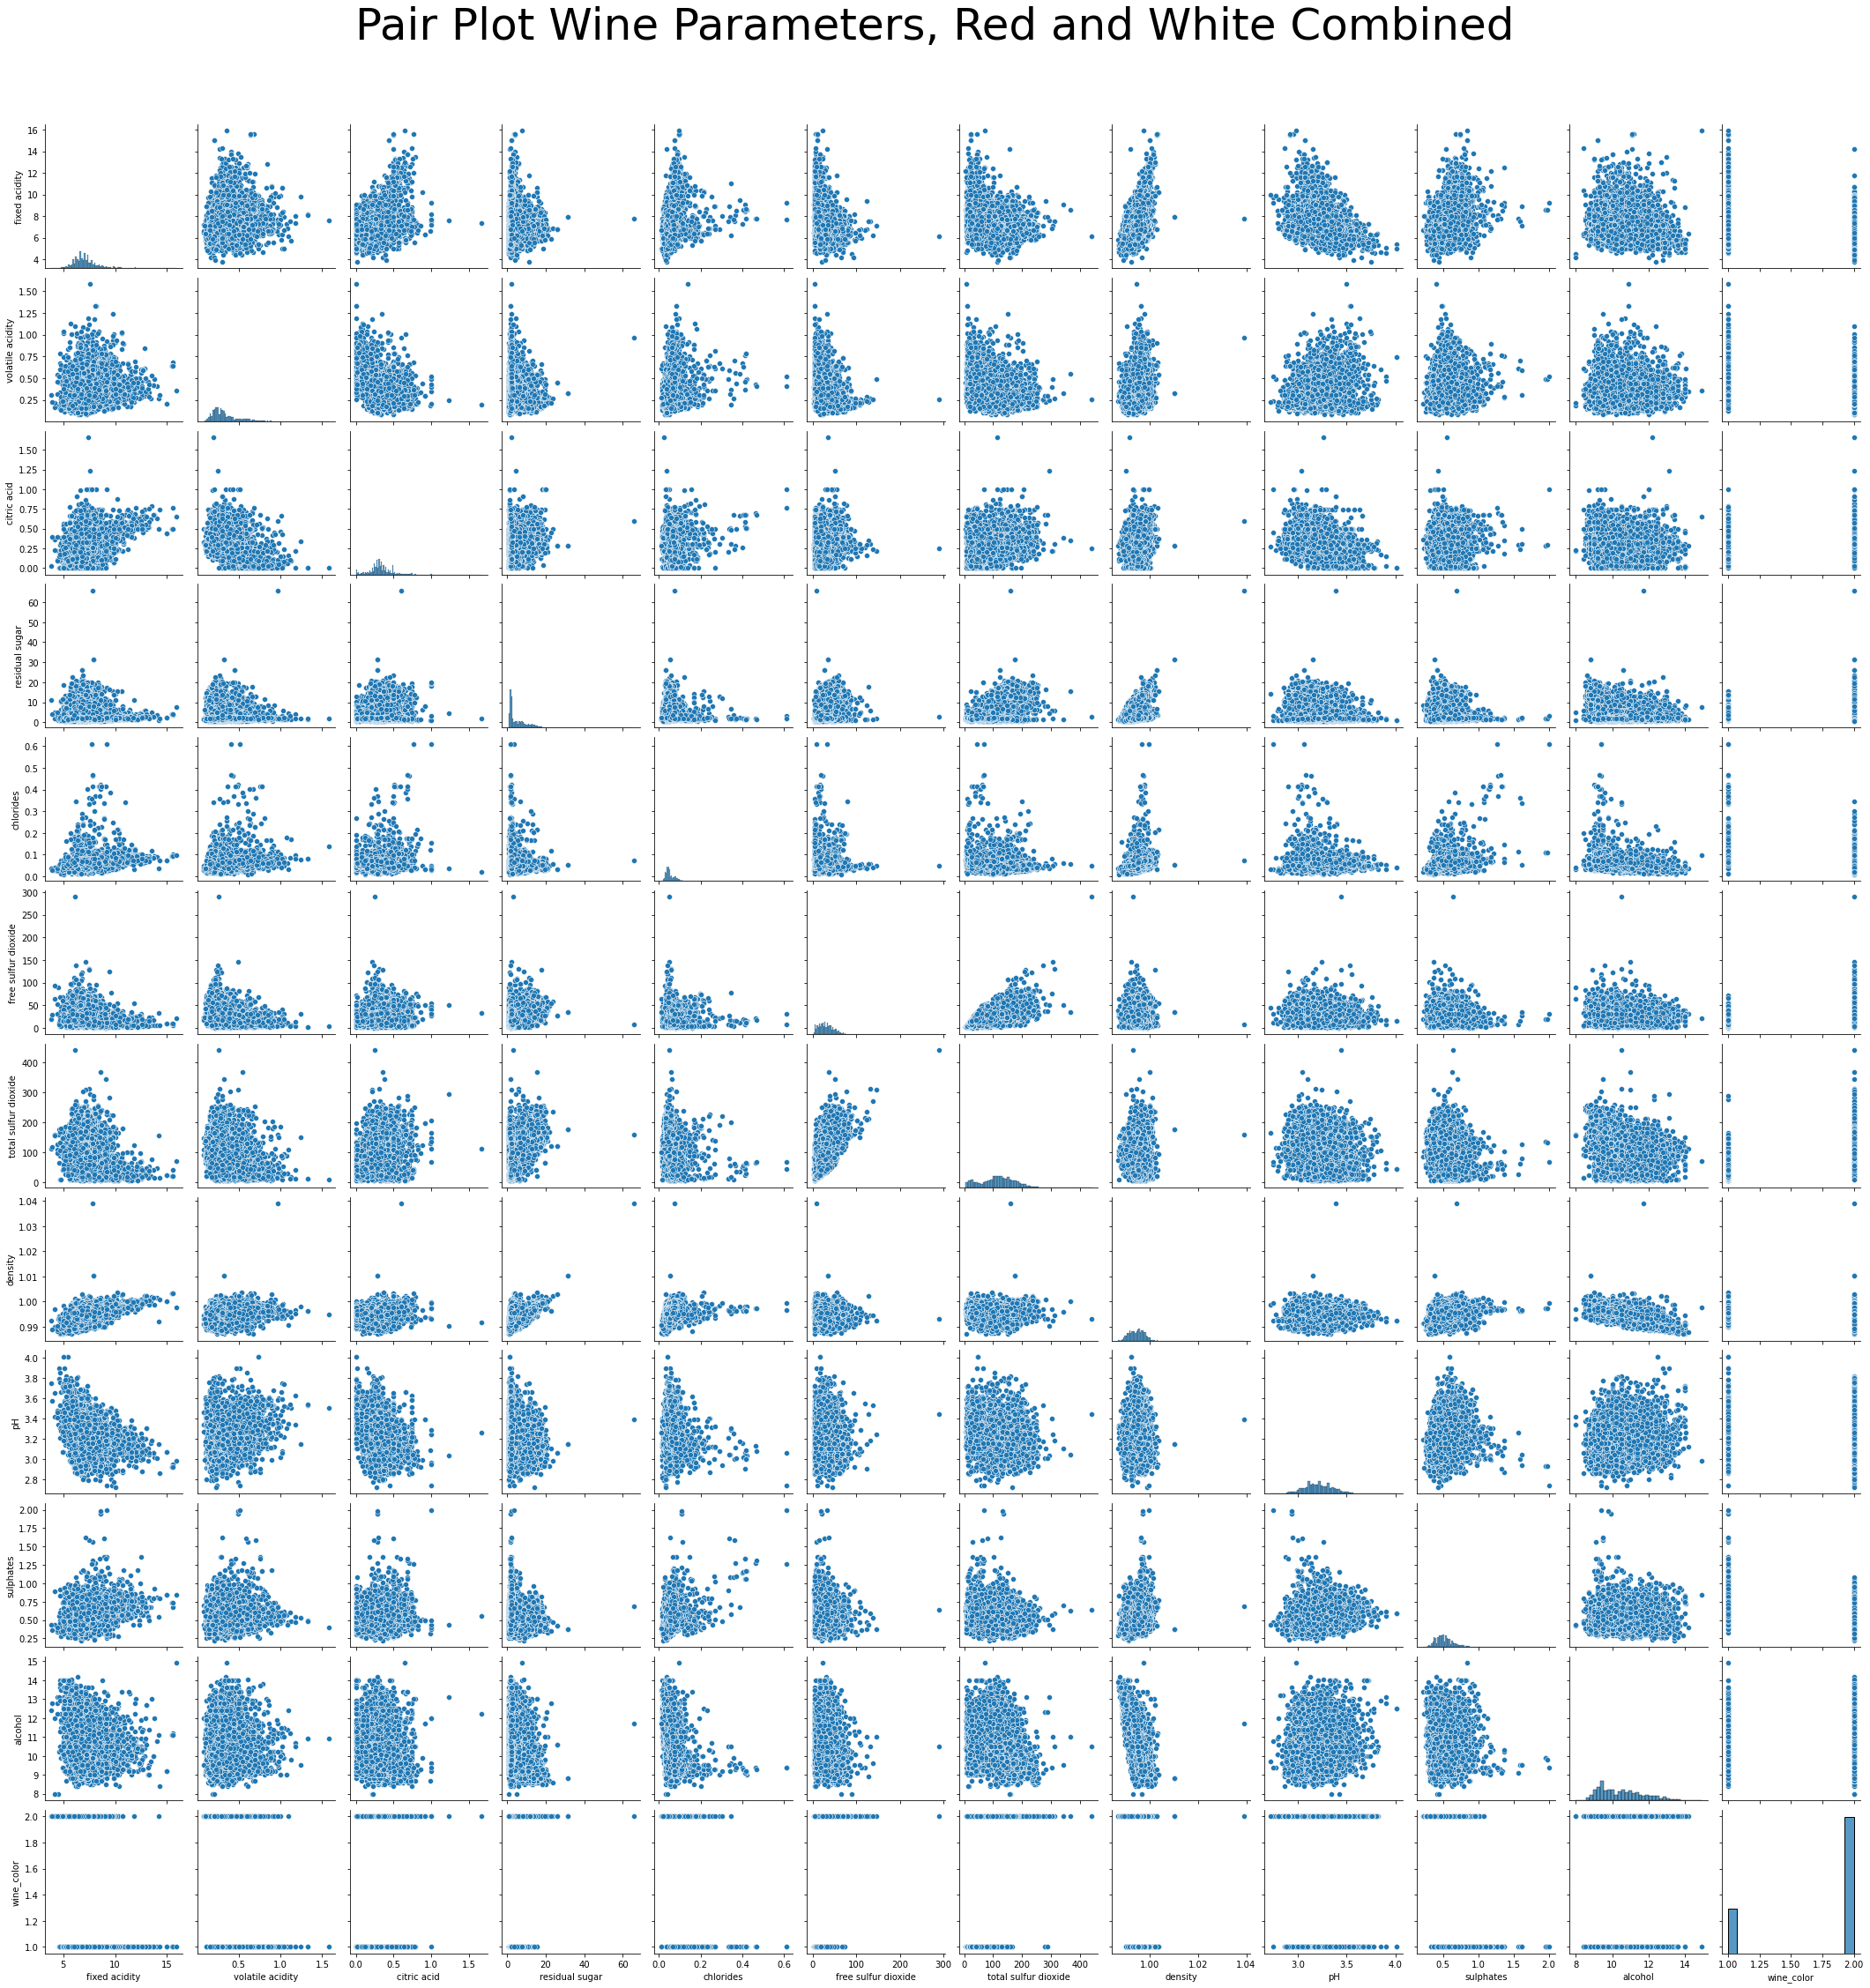

In [11]:
g = sns.pairplot(wine[col], palette = 'mako')
g.fig.suptitle('Pair Plot Wine Parameters, Red and White Combined', horizontalalignment = 'center', y=1.05, fontsize=50)
plt.show()

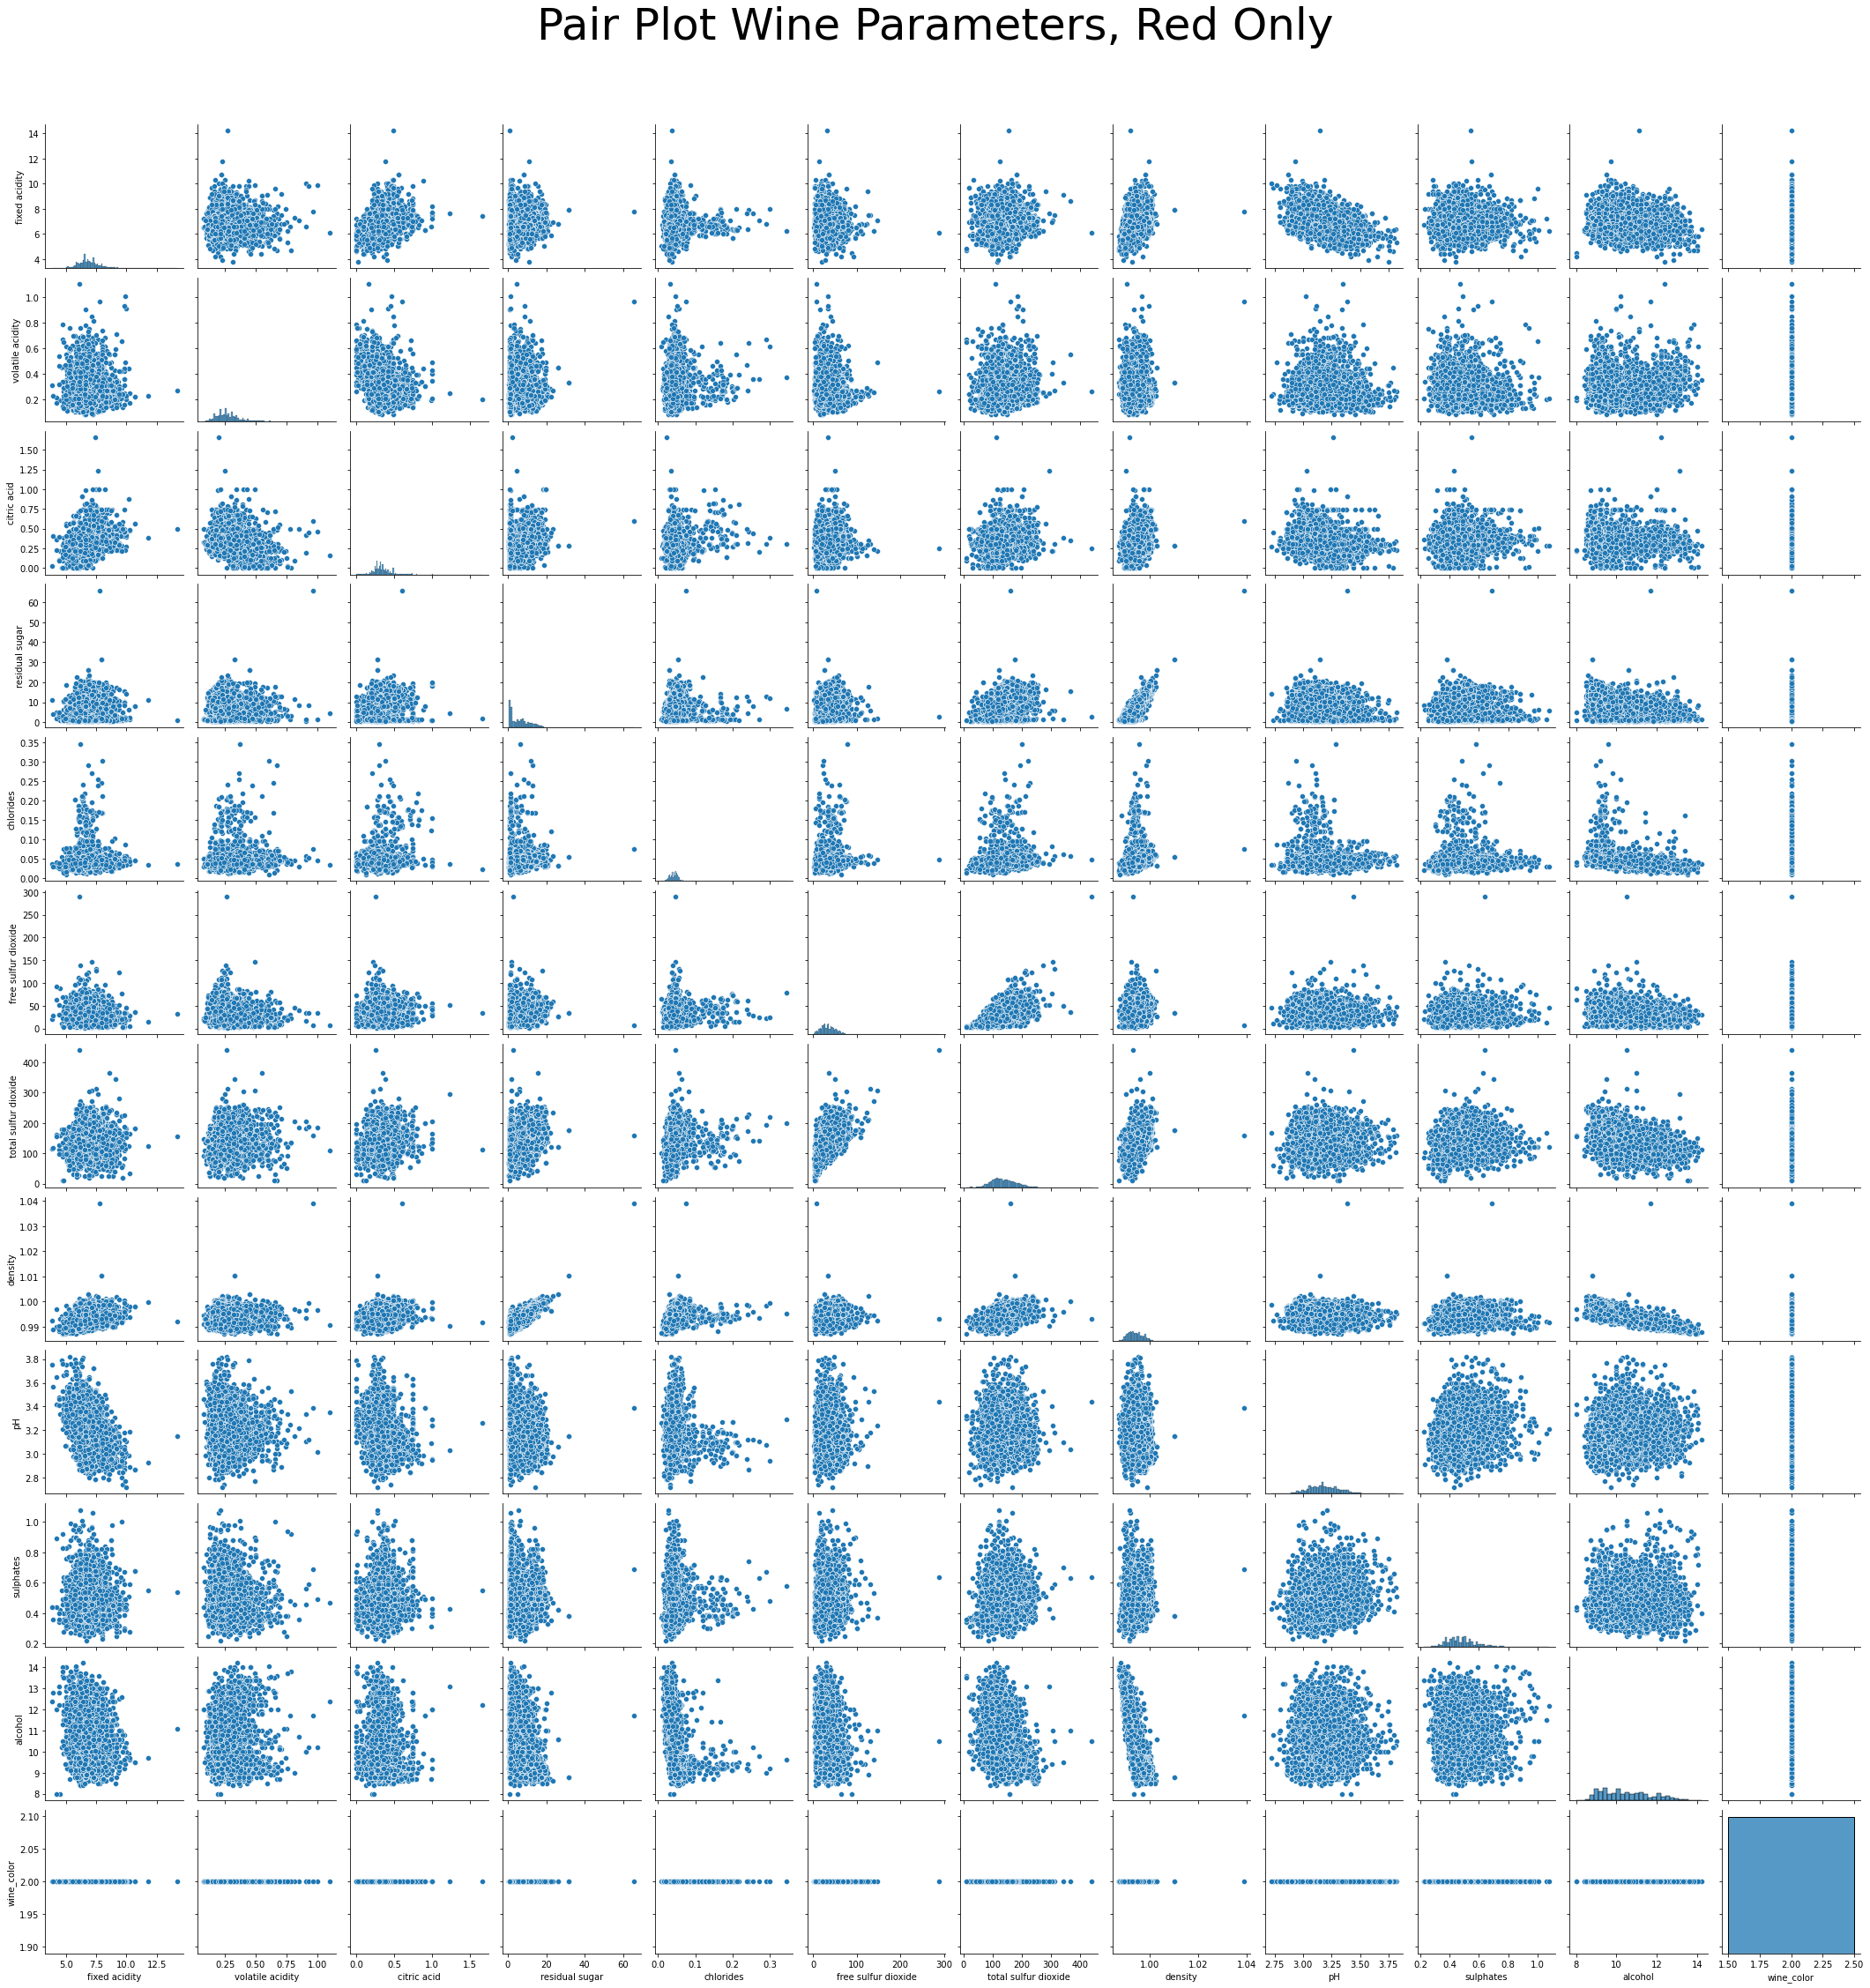

In [12]:
g = sns.pairplot(wine.loc[wine['wine_color']==2, col], palette = 'mako')
g.fig.suptitle('Pair Plot Wine Parameters, Red Only', horizontalalignment = 'center', y=1.05, fontsize=50)
plt.show()

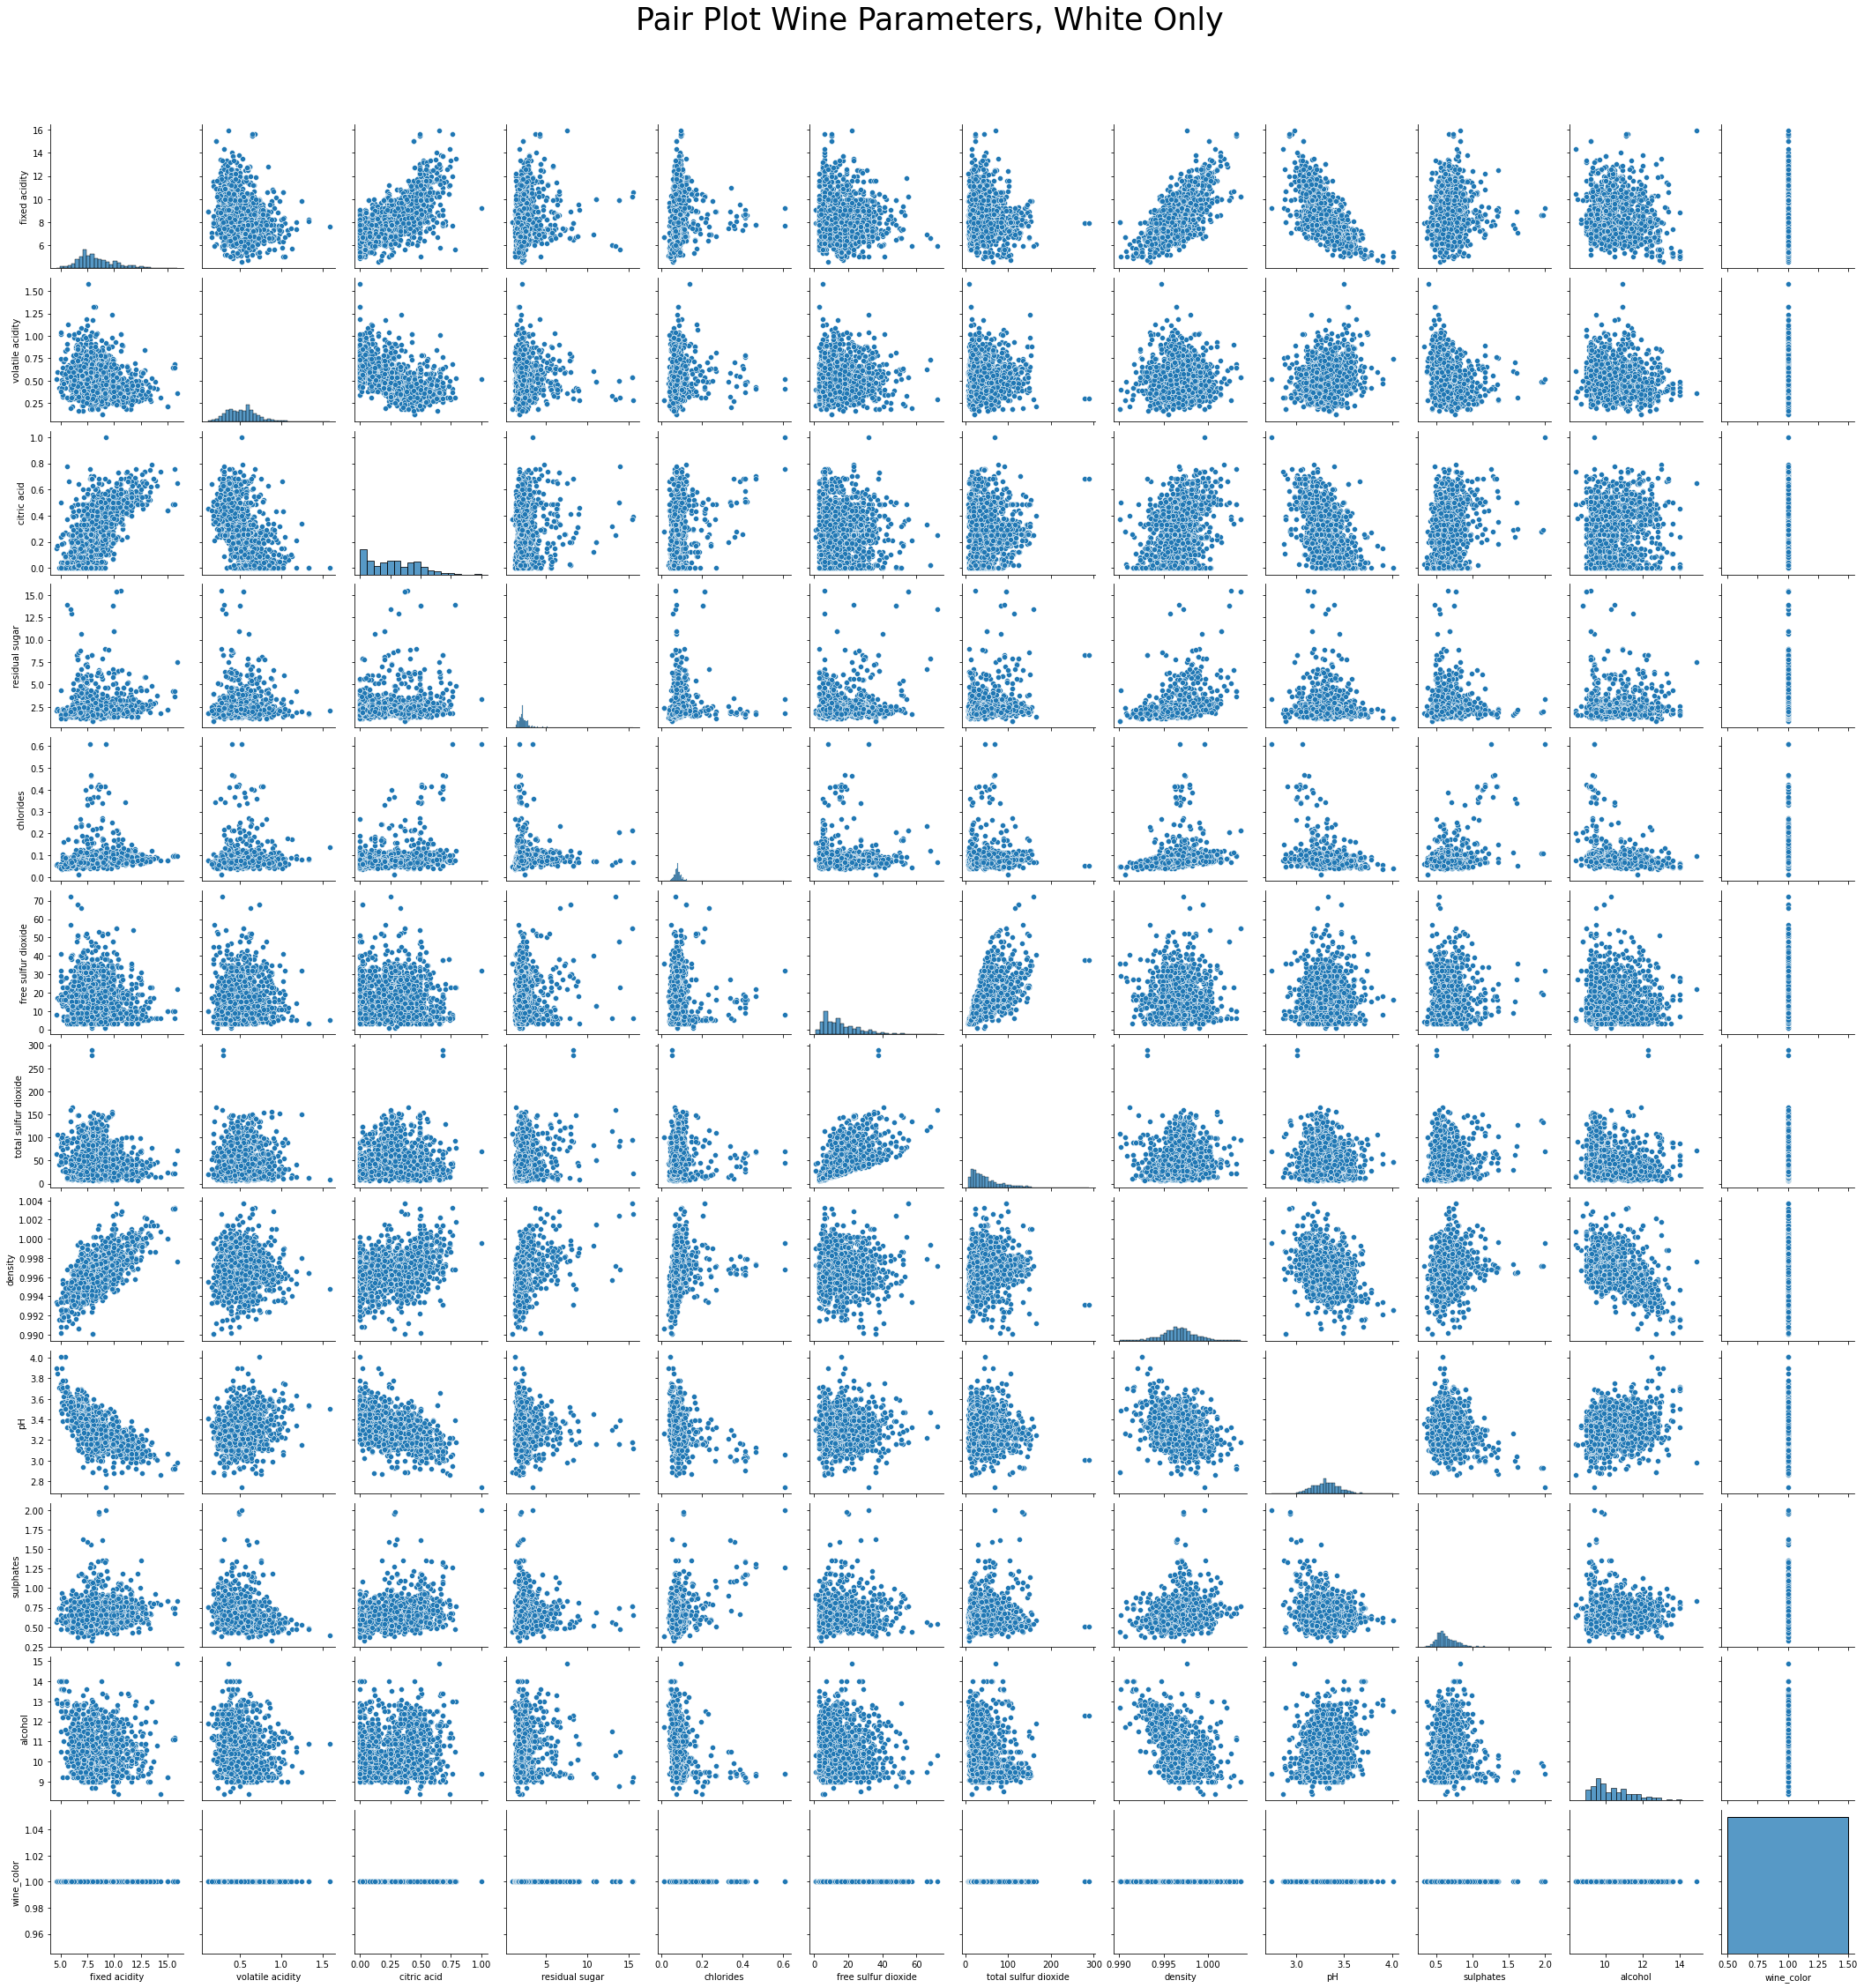

In [13]:
g = sns.pairplot(wine.loc[wine['wine_color']==1, col], palette = 'mako')
g.fig.suptitle('Pair Plot Wine Parameters, White Only', horizontalalignment = 'center', y=1.05, fontsize=35)
plt.show()

Density and acidity appear to have some linear relationships.  Quality versus the other measures is a little harder to tell visually.

#### Visualize some interesting specific relationships

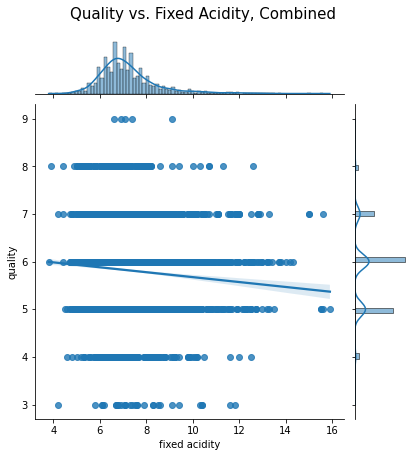

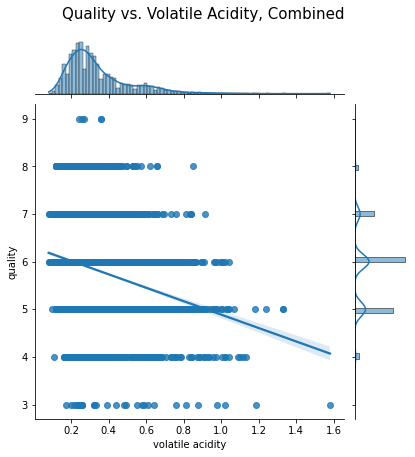

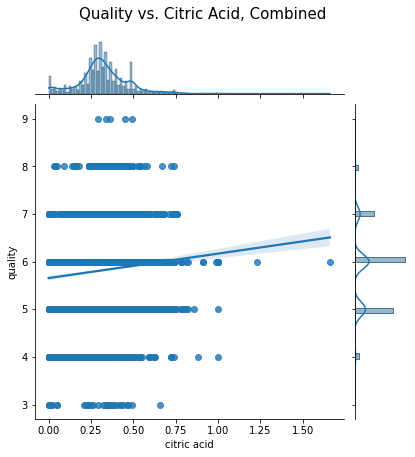

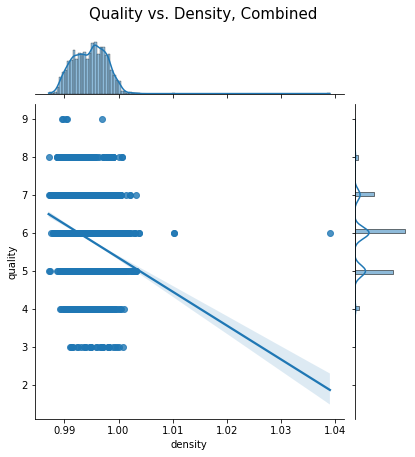

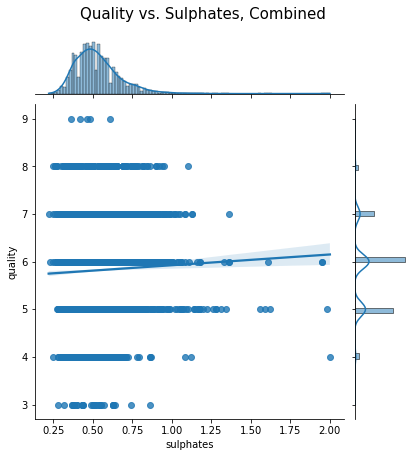

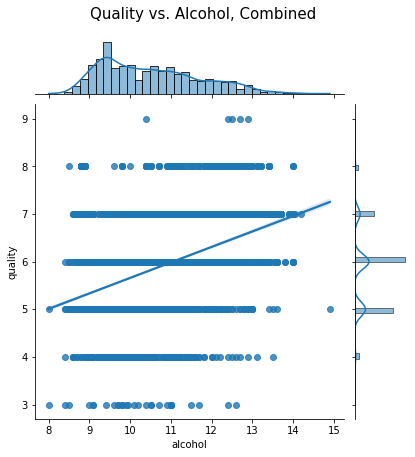

In [14]:
# First, combined

col_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol']

for c in col_list:
    g = sns.jointplot(x = c, y = 'quality', data =wine, kind = 'reg')
    g.fig.suptitle('Quality vs. '+ c.title() + ', Combined', horizontalalignment = 'center', y=1.05, fontsize=15)
    plt.show()

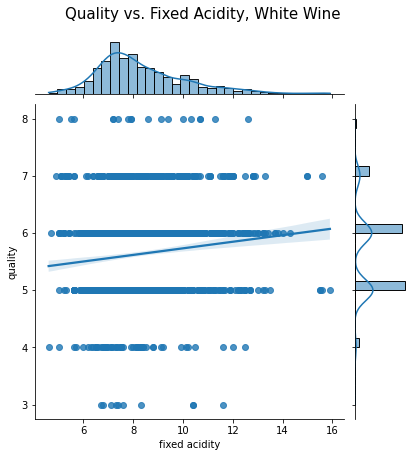

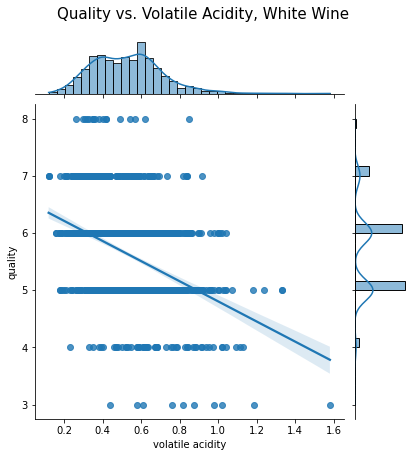

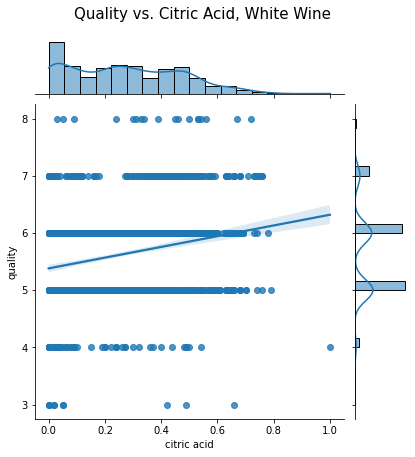

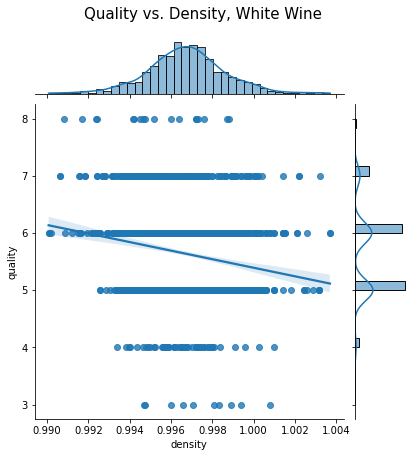

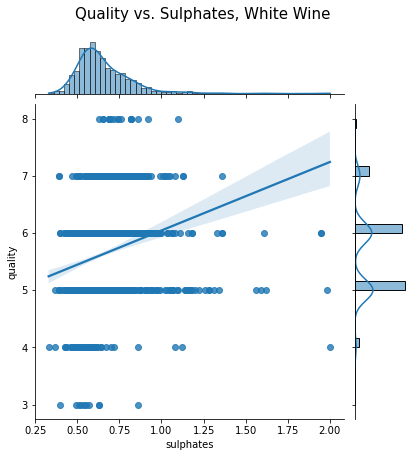

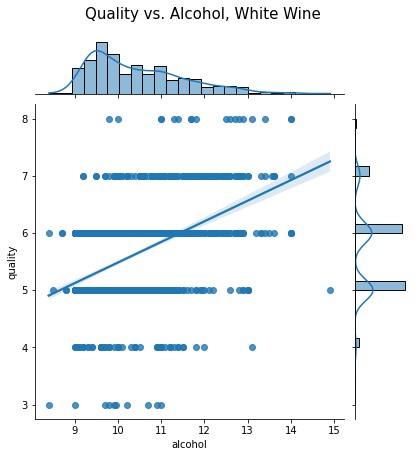

In [15]:
# Next, white only

col_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol']

for c in col_list:
    g = sns.jointplot(x = c, y = 'quality', data =wine[wine['wine_color']==1], kind = 'reg')
    g.fig.suptitle('Quality vs. '+ c.title() + ', White Wine', horizontalalignment = 'center', y=1.05, fontsize=15)
    plt.show()

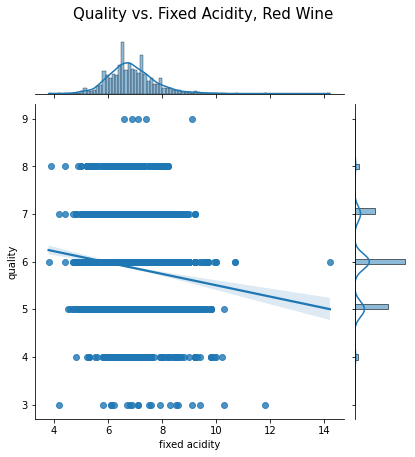

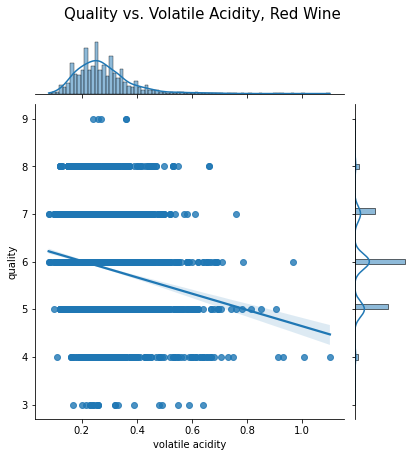

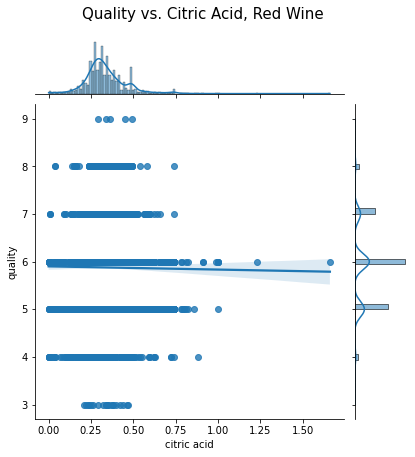

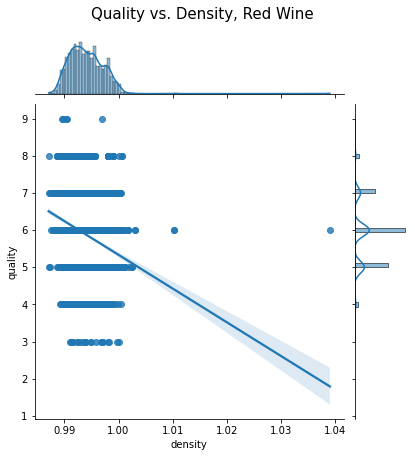

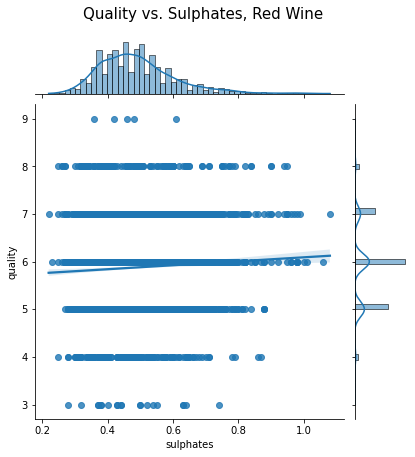

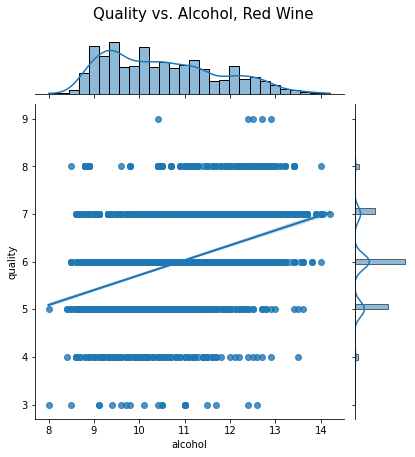

In [16]:
# Finally, red only

col_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol']

for c in col_list:
    g = sns.jointplot(x = c, y = 'quality', data =wine[wine['wine_color']==2], kind = 'reg')
    g.fig.suptitle('Quality vs. '+ c.title() + ', Red Wine', horizontalalignment = 'center', y=1.05, fontsize=15)
    plt.show()

#### Relationships and Correlations
The Spreaman's R for alcohol is 0.4469
The Spreaman's R for wine_color is 0.123
The Spreaman's R for citric acid is 0.1057
The Spreaman's R for free sulfur dioxide is 0.0869
The Spreaman's R for pH is 0.0325
The Spreaman's R for sulphates is 0.0298
The Spreaman's R for residual sugar is -0.0169
The Spreaman's R for total sulfur dioxide is -0.0548
The Spreaman's R for fixed acidity is -0.0982
The Spreaman's R for volatile acidity is -0.2578
The Spreaman's R for chlorides is -0.2951
The Spreaman's R for density is -0.3228
The strongest relationships appear to be quality versus alcohol (.4469), density (-0.3228), clorides (-0.2952), and volatile acidity (-0.2578)